## Programming Lab #2
## Foundations of Machine Learning

The purpose of this project is to build predictive algorithms that predict the likelihood a person has a stroke. The data include:
  
  - `age`: Patient age, numeric
  - `avg_glucose_level`: Blood sugar levels, numeric
  - `bmi`: Body mass index, numeric
  - `ever_married`: Ever married, dummy/character (Yes, No)
  - `gender`: Male, Female, or Other, character
  - `heart_disease`: Has heart disease, dummy
  - `hypertension`: Has hypertension, dummy
  - `id`: Study identification number
  - `Residence_type`: Type of residence, dummy/character (Urban, Rural)
  - `smoking_status`: Former, never, or current smoker, categorical
  - `work_type`: Employment type (Never worked (Never_worked), homemaker ("children"), Public sector employment (Govt_job), Private sector employment (`Private`), Self-employed (`Self-employed`)
  - `stroke`: Suffered a stroke in the sample period
  
The data come in two files: `training_data.csv`, which you should use to build your models, and `testing_data.csv`, which you should use to test your models. The models must be trained on the training data and tested on the testing data, but providing both files allows you to experiment with your choices and iterate on model designs. If performance drops on the testing data, you know there's a problem.
  
You can use any of the tools presented in class: $k$ nearest neighbor, linear models, or decision trees. In principle, $k$ means clustering might also be helpful for looking for patterns in the data that the other methods might miss. Using canned versions of more advanced tools (boosting, bagging, random forests, neural networks, etc.) is deeply unsporting and thus not allowed. You can be creative about transforming variables, or combining decision trees with linear models or $k$NN. Try something interesting. Fail extravagantly. The goal is to work on an intellectually interesting question that is similar to the tasks that data scientists are called on to do every day.
  
We will compare the groups' models to see if there are common trends or significant differences, and also to declare **The Winners** on the basis of whichever team achieves the lowest $RMSE$ on the testing data. A simple linear model with some polynomials and dummy variables achieves an $R^2$ of .087 and a $RMSE$ of .206. 

In [46]:
import pandas as pd
import numpy as np
df_train = pd.read_csv('./data/training_data.csv')
df_test = pd.read_csv('./data/testing_data.csv')
print(df_train.head())
gdf_test = pd.DataFrame.copy(df_test)
gdf_train = pd.DataFrame.copy(df_train)

   Unnamed: 0     id  gender   age  hypertension  heart_disease ever_married  \
0        2465  68685    Male  36.0             0              0          Yes   
1        4311  59058  Female  45.0             0              0          Yes   
2        2375  46068    Male  58.0             0              0           No   
3        5017  36837  Female  61.0             0              0          Yes   
4         753  30550  Female  78.0             0              0           No   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0       Govt_job          Urban              65.87  32.2  formerly smoked   
1       Govt_job          Rural              68.66  25.3     never smoked   
2  Self-employed          Rural             170.93  30.7          Unknown   
3  Self-employed          Urban              69.88  27.1     never smoked   
4        Private          Urban             103.86  30.6          Unknown   

   stroke  
0       0  
1       0  
2       0  
3       

In [35]:
#Data Cleaning
#for smoking status two options: remove nulls or make unkowns as a smoker
#removing Unknown values for smoking
var = 'smoking_status'
print(df_train[var].value_counts()) #1241 unknown values for smoking status of train
print(df_test[var].value_counts()) #303 unknown values for smoking status of test
gdf_train[var] = gdf_train[var].replace('Unknown', np.nan)
gdf_test[var] = gdf_test[var].replace('Unknown', np.nan)
gdf_train[var+'_NA'] = gdf_train[var].isnull()
gdf_test[var+'_NA'] = gdf_test[var].isnull()

never smoked       1505
Unknown            1241
formerly smoked     699
smokes              642
Name: smoking_status, dtype: int64
never smoked       387
Unknown            303
formerly smoked    186
smokes             147
Name: smoking_status, dtype: int64


In [36]:
#pick either one below and try to run in multiple ways

In [48]:
print(pd.crosstab(df_train[var],df_train['stroke']),'\n') #cant assume anything with the stroke 
print(pd.crosstab(df_test[var],df_test['stroke']),'\n') #cant assume anything with the stroke 

print(pd.crosstab(df_train[var],df_train['work_type']),'\n') #cant assume anything with the stroke 
print(pd.crosstab(df_test[var],df_test['work_type']),'\n') #cant assume anything with the stroke 

#print(pd.crosstab(gdf_test[var+'_NA'],gdf_test['stroke']),'\n')

stroke              0   1
smoking_status           
Unknown          1204  37
formerly smoked   645  54
never smoked     1434  71
smokes            605  37 

stroke             0   1
smoking_status          
Unknown          293  10
formerly smoked  170  16
never smoked     368  19
smokes           142   5 

work_type        Govt_job  Never_worked  Private  Self-employed  children
smoking_status                                                           
Unknown               100             7      518            129       487
formerly smoked       108             0      419            161        11
never smoked          229             8      955            271        42
smokes                 97             0      437            106         2 

age              0.16   0.24   0.32   0.48   0.56   0.64   0.72   0.88   \
smoking_status                                                            
Unknown              1      1      1      1      1      1      2      1   
formerly smoked    

<AxesSubplot:>

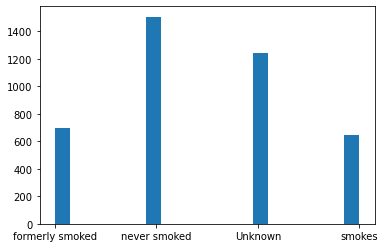

In [39]:
print(pd.crosstab(df[var+'_NA'],df['satjob']),'\n')
#gdf_test[var].hist(bins=20,grid=False)
df_train[var].hist(bins=20,grid=False)

In [ ]:
#removing Unknown values for smoking
gdf_test=gdf_test.loc[gdf_test[var+'_NA']== 0,:]
gdf_train=gdf_train.loc[gdf_train[var+'_NA']== 0,:]

In [33]:
#replacing unknown values as smoking as assume that people who did not awnser that question probably are smoking still
gdf_train.loc[gdf_train[var].isnull(), var] = 'smokes' # Changing rows with nans to a new category called "not happy"
print('Total Missings: \n', sum(gdf_train[var].isnull()),'\n') # checks that nulls were renamed
gdf_test.loc[gdf_test[var].isnull(), var] = 'smokes' # Changing rows with nans to a new category called "not happy"
print('Total Missings: \n', sum(gdf_test[var].isnull()),'\n') # checks that nulls were renamed

Total Missings: 
 0 

Total Missings: 
 0 



In [ ]:
y_train = df_train['stroke']
X_train = df_train.drop('stroke',axis=1)
y_test = df_test['stroke']
X_test = df_test.drop('stroke',axis=1)

X_train['bmi'] = X_train['bmi'].fillna(X_train['bmi'].mean())
X_test['bmi'] = X_test['bmi'].fillna(X_test['bmi'].mean())

In [2]:
## Linear Model
from sklearn.linear_model import LinearRegression # Import linear regression model
from sklearn.preprocessing import PolynomialFeatures

X_train_numeric = X_train.loc[:,['age','hypertension','heart_disease','bmi','avg_glucose_level'] ]
#
expander = PolynomialFeatures(degree=2,include_bias=False) # Create the expander
Z = expander.fit_transform(X_train_numeric) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
continuous = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe
#
dummies = pd.concat([ pd.get_dummies(X_train['work_type'],dtype='int',drop_first=True),
                      pd.get_dummies(X_train['Residence_type'],dtype='int',drop_first=True),
                      pd.get_dummies(X_train['smoking_status'],dtype='int',drop_first=True)],axis=1)
#
Z_train = pd.concat([continuous,dummies],axis=1)

X_test_numeric = X_test.loc[:,['age','hypertension','heart_disease','bmi','avg_glucose_level'] ]
#
expander = PolynomialFeatures(degree=2,include_bias=False) # Create the expander
Z = expander.fit_transform(X_test_numeric) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
continuous = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe

dummies = pd.concat([ pd.get_dummies(X_test['work_type'],dtype='int',drop_first=True),
                      pd.get_dummies(X_test['Residence_type'],dtype='int',drop_first=True),
                      pd.get_dummies(X_test['smoking_status'],dtype='int',drop_first=True)],axis=1)
#
Z_test = pd.concat([continuous,dummies],axis=1)

# Fit the model and get the R2 measure:
reg = LinearRegression().fit(Z_train, y_train) # Fit the linear model
print('R2: ', reg.score(Z_test, y_test)) # R squared measure
y_hat = reg.predict(Z_test)
N = len(y_test)
print('RMSE: ', (np.sum( (y_test - y_hat)**2)/N )**.5 )   # R squared measure


R2:  0.08717964343843831
RMSE:  0.20599583849613765


This is supposed to be fairly "fun," so please do not turn it into a combinatorial nightmare of comparing thousands of model specifications. Settle on a strategy you think is promising, crank it out, and write up the results. Your time and energy are valuable, so learn to recognize when the marginal cost of another twenty minutes on a project exceeds the benefit in terms of improving the results and your grade.
  
## Paper format

The format of the paper should be:

  - Summary: A one paragraph description of the question, methods, and results (about 350 words).
  - Data: One to two pages discussing the data and key variables, and any challenges in reading, cleaning, and preparing them for analysis.
  - Results: Two to five pages providing visualizations, statistics, a discussion of your methodology, and a presentation of your main findings. 
  - Conclusion: One to two pages summarizing the project, defending it from criticism, and suggesting additional work that was outside the scope of the project.
  - Appendix: If you have a significant number of additional plots or table that you feel are essential to the project, you can put any amount of extra content at the end and reference it from the body of the paper. 

## Submission

Half of each student's grade is based on their commits to the repo. Each student is expected to do something specific that contributes to the overall project outcome. Since commits are recorded explicitly by Git/GitHub, this is observable. A student can contribute by cleaning data, creating visualizations,performing analytic analyses,  or writing about results, but everyone has to do something substantial. A student's work doesn't need to make it into the final report to be valuable and substantial, and fulfill the requirement to make a contribution to the project. 

The other half of each student's grade is based on the written report. Groups will work together on combining results and writing up findings in a Jupyter noteb,ok, using code chunks to execute Python commands and markdown chunks to structure the paper and provide exposition. The notebook should run on Colab or Rivana from beginning to end without any errors.

mbers submit.

## Criteria

The project is graded based on four criteria:

  - Project Concept: What is the strategy for building and testing the group's models? How did the group decide how to use the tools presented so far in class? How did the group compare the performance of the options considered, and settle on a final choice for submission?
  - Wrangling, EDA, and Visualization: How are are missing values handled? For variables with large numbers of missing values, to what extent do the data and documentation provide an explanation for the missing data? If multiple data sources are used, how are the data merged? For the main variables in the analysis, are the relevant data summarized and visualized through a histogram or kernel density plot where appropriate? Are basic quantitative features of the data addressed and explained? How are outliers characterized and addressed? 
  - Analysis: What are the groups' main findings? Do the tables, plots, and statistics support the conclusions? Is the research strategy carried out correctly? If the research strategy succeeds, are the results interpreted correctly and appropriately? If the research strategy fails, is a useful discussion of the flaws of the data collection process or the research strategy discussed?
  - Replication/Documentation: Is the code appropriately commented? Can the main results be replicated from the code and original data files? Are significant choices noted and explained?

Each of the four criteria are equally weighted (25 points out of 100).